In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo

In [5]:
test_1 = np.ones((45, 45))

error = (np.random.rand(45, 45) - (0.5 * np.ones((45, 45)))) * 0.1
test_2 = np.ones((45, 45))
test_2 += error

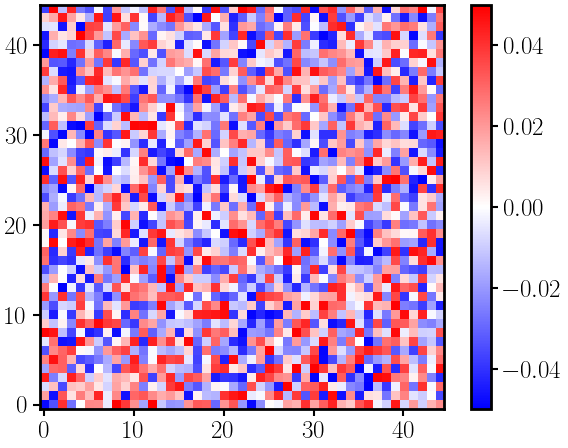

In [9]:
plot.plot(test_1 - test_2, cmap='bwr', colorbar=True)

In [10]:
def chi2_distance(A, B):
    chi = 0.5 * np.sum([((a - b) ** 2) / (a + b) 
                      for (a, b) in zip(A, B)])
    return chi

def chi_square(observed, expected):
    return (((observed - expected) ** 2) / expected).sum().sum()

In [11]:
print(chi2_distance(test_1, test_2))
print(chi_square(test_2, test_1))

0.41765402540695573
1.6706524852403384


In [12]:
print(chi2_distance(test_1, test_1))
print(chi_square(test_1, test_1))

0.0
0.0


In [14]:
error_factors = np.linspace(0, 1, 1000)
chi2 = []
chi = []

for factor in error_factors:
    test_1 = np.ones((45, 45))
    error = (np.random.rand(45, 45) - (0.5 * np.ones((45, 45)))) * factor
    test_2 = np.ones((45, 45)) + error
    chi2.append(chi2_distance(test_1, test_2))
    chi.append(chi_square(test_2, test_1))

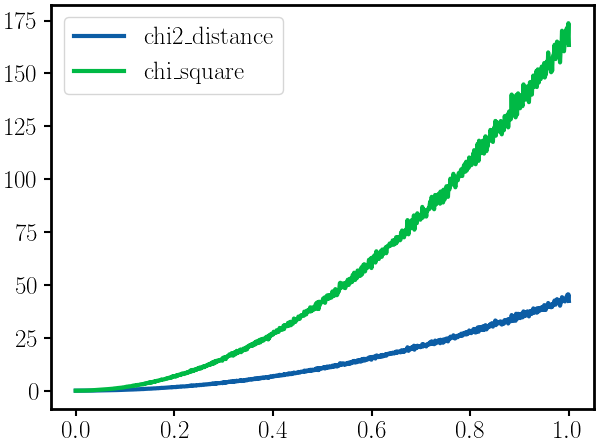

In [15]:
plt.plot(error_factors, chi2, label='chi2_distance')
plt.plot(error_factors, chi, label='chi_square')
plt.legend()
plt.show()